<img src="./logo_UTN.svg" align="right" width="250" /> 

#### Teoría de Circuitos II - R4001
# Trabajo semanal 5
#### Benjamín Ithurburu

### Introducción: 
En este notebook diseñará un filtro Pasa Bajos Bessel a partir de la siguiente plantilla:

<center><img src="./plantilla.png" width="300"/></center>

### Diseño
En el PDF adjuntado a continuación se desarrollan los puntos del **1)** al **4)** del trabajo, incluyendo la desnormalización final del punto bonus.

In [14]:
from IPython.display import IFrame
IFrame("./Trabajo semanal 5.pdf", width=1000, height=1000)

### Simulación Python
A continuación se procede a instanciar funciones y configurar el entorno del notebook para su posterior uso en las simulaciones.

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib ipympl
import numpy as np
from scipy import signal
from scipy.signal import TransferFunction

# módulo de análisis simbólico
import sympy as sp
# variable de Laplace
from sympy.abc import s
from IPython.display import display, Math, Markdown

from pytc2.sistemas_lineales import parametrize_sos, pzmap, GroupDelay, bodePlot, tfcascade
from pytc2.general import print_subtitle

# Configuración de parámetros para fijar estilo de gráficos en notebook. 
# Con el objetivo de que el tamaño de salida, sea adecuado al jubyter notebook.

#%% Inicialización de librerías

# Para eliminar bugs:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 14
fig_sz_y = 8
fig_dpi = 70
fig_front_size = 15

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_front_size})

#%% Fin - Inicialización de librerías

Se procede a obtener los polos de la función transferencia y sus respectivos coeficientes $\alpha$ y $\beta$ 

In [3]:
num = [15]
den = [1, 6, 15, 15]
# Se obtienen las raices del denominador de T3(s)
roots = np.roots(den)

alpha1 = np.absolute(np.real(roots[0]))
print("alpha1 = ", alpha1)
beta1 = np.imag(roots[0])
print("beta1 = ", beta1)

alpha2 = np.absolute(np.real(roots[1]))
print("alpha2 = ", alpha2)
beta2 = np.imag(roots[1])
print("beta2 = ", beta2)

alpha3 = np.absolute(np.real(roots[2]))
print("alpha3 = ", alpha3)
beta3 = np.imag(roots[2])
print("beta3 = ", beta3)


alpha1 =  1.8389073226869572
beta1 =  1.754380959783719
alpha2 =  1.8389073226869572
beta2 =  -1.754380959783719
alpha3 =  2.322185354626094
beta3 =  0.0


Gráfico de Retardo de Grupo a partir de la función transferencia de un Bessel Pasa Bajos de orden 3 obtenido en el punto 1)

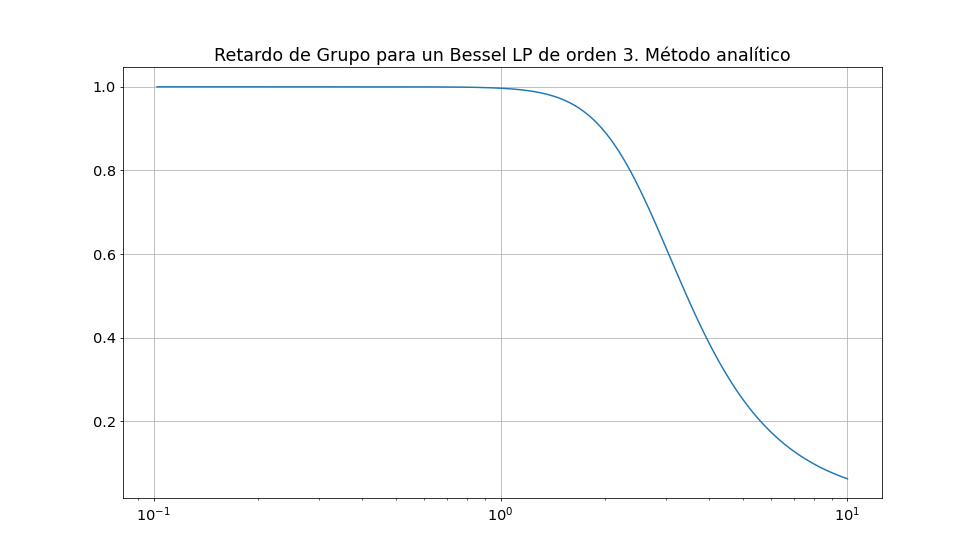

In [4]:
# Gráfico de Retardo de Grupo a partir de la función transferencia de un Bessel Pasa Bajos de orden 3 obtenido en el punto 1)

w, T = signal.freqs(num, den)
plt.figure()
plt.semilogx(w[1:], -np.diff(np.unwrap(np.angle(T)))/np.diff(w))
plt.grid()
plt.title('Retardo de Grupo para un Bessel LP de orden 3. Método analítico')
plt.show()

Gráfico de Retardo de Grupo a partir de la transferencia obtenida con la función signal.bessel

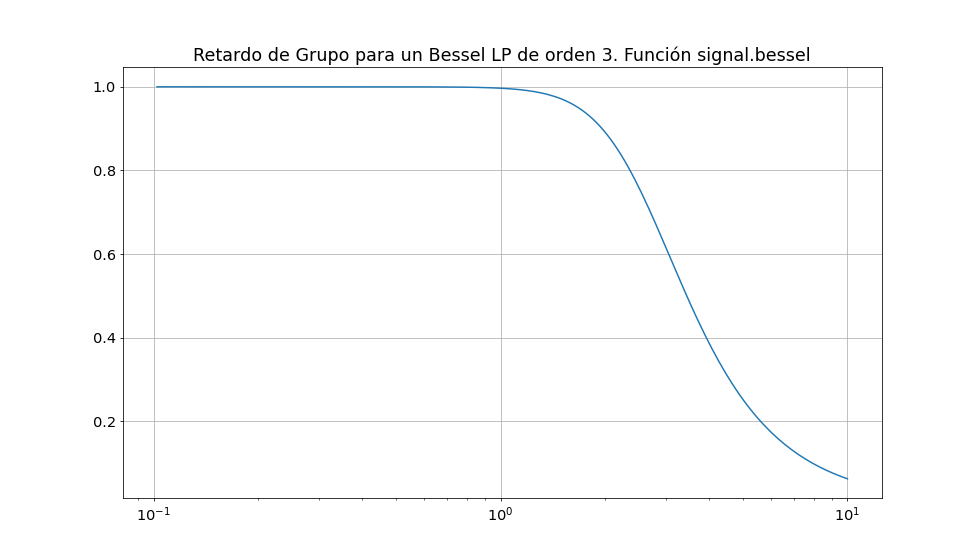

In [5]:
# Gráfico de Retardo de Grupo a partir de la transferencia obtenida con la función signal.bessel
b, a = signal.bessel(3, 1, 'low', analog=True, norm='delay')
w, h = signal.freqs(b, a)

plt.figure()
plt.semilogx(w[1:], -np.diff(np.unwrap(np.angle(h)))/np.diff(w))
plt.grid()
plt.title('Retardo de Grupo para un Bessel LP de orden 3. Función signal.bessel')
plt.show()

Cálculo de error o desviamiento de D(2.5) respecto de D(0)

In [6]:
# Cálculo de error o desviamiento de D(2.5) respecto de D(0)
result = []
for w in [0, 2.5]:
    D = alpha1/(alpha1**2 + (w + beta1)**2) + alpha2/(alpha2**2 + (w + beta2)**2) + alpha3/(alpha3**2 + (w + beta3)**2)
    print(f"D({w}) = {D}",end="\n")
    result.append(D)

error = (result[0] - result[1])*100
print("error = ", error)

D(0) = 0.9999999999999993
D(2.5) = 0.7520825069416894
error =  24.79174930583099


Obtención de la función transferencia de la configuración Sallen-Key, filtro de orden 1 y del Bessel de orden 3 logrado por la concatenación de ambos filtros

In [7]:
# Simulación simbólica

# Sallen-Key:
# Definición de variables simbólicas
s = sp.symbols('s', complex=True)
G1, G2, C1, C2 = sp.symbols("G1, G2, C1, C2")
Vi, Vo, Va, Vb = sp.symbols("Vi, Vo, Va, Vb")

# Sistemas de ecuaciones del modelo Sallen-Key
aa = sp.solve([
                (G1 + G2 + s*C2)*Va - G1*Vi - G2*Vb - s*C2*Vo, 
                (G2 + s*C1)*Vb - G2*Va,
                Vb - Vo
                ], 
                [Vi, Vo, Va, Vb])
T = aa[Vo]/aa[Vi]

num1, den1 = sp.fraction(sp.simplify(sp.expand(T)))
num1 = sp.Poly(num1,s)
den1 = sp.Poly(den1,s)

print_subtitle('Transferencia de Sallen-Key con K=1')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(sp.Mul(num1/den1, evaluate=False)) ))


# Pasa Bajos de orden 1
# Definición de variables simbólicas
C3, G3 = sp.symbols("C3, G3")

num2 = G3/C3
den2 = s + G3/C3

print_subtitle('Transferencia de pasa bajos orden 1')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(sp.Mul(num2/den2, evaluate=False)) ))


# Pasa Bajos Bessel de orden 3
print_subtitle('Transferencia de filtro Pasa Bajos Bessel de orden 3')
display(Math( r' \frac{V_o}{V_i} = ' + sp.latex(sp.simplify(sp.expand(sp.Mul(num1/den1, num2/den2, evaluate=False))))) )

#### Transferencia de Sallen-Key con K=1

<IPython.core.display.Math object>

#### Transferencia de pasa bajos orden 1

<IPython.core.display.Math object>

#### Transferencia de filtro Pasa Bajos Bessel de orden 3

<IPython.core.display.Math object>

Sintetización de la función transferencia para la obtención de la red normalizada y desnormalizada

In [12]:
# Valores normalizados de los componentes luego de la sintetilazación
C1_n = alpha1/(alpha1**2+beta1**2)
C2_n = 1/alpha1
C3_n = (alpha1**2 + beta1**2)/15
R1_n = 1
R2_n = 1
R3_n = 1

# Valores desnormalizados de los componentes, para D(0)=200uSeg
D0 = 200e-6
omega_f = 1/D0
C1 = C1_n/omega_f
C2 = C2_n/omega_f
C3 = C3_n/omega_f
R1 = R1_n
R2 = R2_n
R3 = R3_n

print("C1 = ", C1)
print("C2 = ", C2)
print("C3 = ", C3)
print("R1 = ", R1)
print("R2 = ", R2)
print("R3 = ", R3)

C1 =  5.6937115376777645e-05
C2 =  0.0001087602390466127
C3 =  8.612576924644473e-05
R1 =  1
R2 =  1
R3 =  1


In [13]:
# Se obtienen los valores de los componentes en función de los parámetros wo y Q

Wo = np.sqrt(alpha1**2 + beta1**2)
Q = Wo/(2*alpha1)
# Valores normalizados de los componentes luego de la sintetilazación
C1_n = 1/(2*Q*Wo)
C2_n = 2*Q/Wo
C3_n = (Wo**2)/15
R1_n = 1
R2_n = 1
R3_n = 1

# Valores desnormalizados de los componentes, para D(0)=200uSeg
D0 = 200e-6
omega_f = 1/D0
C2 = C2_n/omega_f
C3 = C3_n/omega_f
R1 = R1_n
R2 = R2_n
R3 = R3_n

print("C1 = ", C1)
print("C2 = ", C2)
print("C3 = ", C3)
print("R1 = ", R1)
print("R2 = ", R2)
print("R3 = ", R3)

C1 =  5.6937115376777645e-05
C2 =  0.00010876023904661267
C3 =  8.612576924644473e-05
R1 =  1
R2 =  1
R3 =  1


### Simulación circuital
A continuación se incluye la simulacion en LTspice de la red desnormalizada, que cumple con los requisitos pedidos en la plantilla.

##### Esquemático
<center><img src="./circuito_simulacion_desnormalizado.png" width="1000"/></center>

##### Retardo de Grupo
<center><img src="./Retardo de Grupo_simulacion_desnormalizado.png" width="1000"/></center>

$f_{1}=\frac{\Omega_w}{2\pi}=\frac{\omega_o}{2\pi}=\frac{5000 rad/seg}{2\pi}\approx795.77 Hz$

##### Error
<center><img src="./Retardo de Grupo_simulacion de error.png" width="1000"/></center>

$f_{0}\approx0 Hz$ ; $f_{2.5}=\frac{2.5\cdot\Omega_w}{2\pi}\approx1989.44 Hz$

### Conclusión
A través del trabajo realizado, ser logró diseñar un Filtro Pasa Bajos Bessel de orden 3 a partir de una red Sallen-Key y un filtro de orden 1, cumpliendo con la plantilla pedida en el enunciado.
Posteriormente se verificó la atenuación calculada de $0.9dB$ en $\omega_o = 5000$ y el Retardo de Grupo para el circuito desnormalizado con un delay de 200uSeg en $\omega = 0$. Obteniendose un error del $24.93\%$ entre $\omega = 0$ y $\omega = 2.5*5000$, tal como se calculó en Python al determinar que $(D_{(0)}-D_{(2.5)})*100=24.7917$. Estos resultados validan la precisión y efectividad del diseño del filtro Bessel en términos de retardo de grupo, alineándose con los objetivos establecidos.